In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bring in dataframe 
df = pd.read_csv(r'prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

### Initial pass thoughts
This needs to be broken into multiple dataframes during cleaning process
Large numbers of columns have 'Nulls', this may or may not be a problem later
Need to identify the columns that should be together. 

#### I intend to use the column "ListingKey" as the reference point for all other dataframes as it is a full column. 


In [7]:
# This cell for checking each row before making the corrections list below, the code varied row by row
df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

#### Cleaning items list:
* CreditGrade should be categorical and orderd
** AA, A, B, C, D, E, NC, HR
** NC (Likely for 'No Credit') is higher than HR (Likely for 'High Risk')
** CreditGrade and ProsperRating (Alpha) should possibly be combined into one column
* ListingCreationDate should be a datetime datatype
* ClosedDate should be a datetime datatype
* ProsperRating (numeric)could be converted to int format maybe
* ProsperRating (Alpha) should be categorical and ordered
** AA, A, B, C, D, E, HR
** ProsperRating (Alpha) and CreditGrade should possibly be combined into one column for analysis
* DateCreditPulled should be a datetime datatype
* Employment status should be categorical and ordered
** Employed, Full-time, Self-employed, Part-time, Retired, Not employed, Other, Not available
* DateCreditPulled should be a datetime datatype
* CurrentCreditLines should be an int data type
* OpenCreditLines      "    "  "   "   "   " 
* TotalCreditLinespast7years " " " "   "   " 
* InquiriesLast6Months "    "  "   "   "   " 
* InquiriesLast6Months "    "  "   "   "   " 
* CurrentDelinquencies "    "  "   "   "   "
* DelinquenciesLast7Years "    "  "   "   "   "         
* PublicRecordsLast10Years"    "  "   "   "   "           
* PublicRecordsLast12Months"    "  "   "   "   " 
* TotalTrades"    "  "   "   "   "
* TradesOpenedLast6Months"    "  "   "   "   "
* IncomeRange should be a categorical data type and ordered
** 100,000+, 75,000-99,999, 50,000-74,999, 25,000-49,999, 1-24,999, 0, Not displayed, Not employed
* TotalProsperLoans  should be an int data type
* OnTimeProsperPayments "    "  "   "   "   "
* ProsperPaymentsLessThanOneMonthLate 
* ProsperPaymentsOneMonthPlusLate 
* LoanFirstDefaultedCycleNumber
* LoanOriginationDate should be a datetime datatype

* Nulls will need to be dealt with as well.

#### Tidying list :
The following columns should be grouped together before changes are made (colors are used in Excel to group
prospective dataframes for intial pass to reduce each to a single observational unit):


* ListingKey (Yellow)
** ListingNumber
** ListingCreationDate
** ProsperPrincipalBorrowed
** ProsperPrincipalOutstanding
** MemberKey
** MonthlyLoanPayment
** PercentFunded
** Recommendations
** InvestmentFromFriendsCount
** InvestmentFromFriendsAmount
** Investors


* CreditGrade (Olive)
** ListingKey
** ProsperRating(numeric/Alpha)
** DateCreditPulled
** CreditScoreRange(Lower/Upper)
** ScorexChangeAtTimeOfListing


* BorrowerAPR (Orange)
** ListingKey
** BorrowerRate
** LenderYield
** EstimatedEffectiveYield
** EstimatedLoss
** EstimatedReturn
** ProsperScore


* BorrowerState (Flesh)
** ListingKey
** IsBorrowerHomeowner
** ListingCategory


* CurrentlyInGroup (dark blue)
** ListingKey
** GroupKey


* FirstRecordedCreditLine (red)
** ListingKey
** CurrentCreditLines
** OpenCreditLines
** TotalCreditLinespast7years
** OpenRevolvingAccounts
** OpenRevolvingMonthlyPayment
** RevolvingCreditBalance
** BankcardUtilization
** AvailableBankcardCredit


* InquiriesLast6Months (pink)
** ListingKey
** TotalInquiries
** CurrentDelinquencies


* AmountDelinquent (grey)
** ListingKey
** DelinquenciesLast7Years
** DebtToIncomeRatio
** ProsperPaymentsLessThanOneMonthLate
** ProsperPaymentsOneMonthPlusLate
** LoanCurrentDaysDelinquent
** LoanFirstDefaultedCycleNumber
** LoanMonthsSinceOrigination
** LoanNumber
** LoanOriginalAmount
** LoanOriginationDate
** LoanOriginationQuarter


* Term (white)
** ListingKey
** LoanStatus
** ClosedDate


* LoanKey (lblue)
** ListingKey
** TotalProsperLoans
** TotalProsperPaymentsBilled
** OnTimeProsperPayments
** LP_CustomerPayments
** LP_CustomerPrincipalPayments
** LP_InterestandFees
** LP_ServiceFees
** LP_CollectionFees
** LP_GrossPrincipalLoss
** LP_NetPrincipalLoss
** LP_NonPrincipalRecoverypayments

#### Initial Dataframe organization block

In [8]:
# First create the individual dataframes, all modifications of data type can be done on the copies.
# Lists by color group to form appropriate dataframes.
yellow = ['ListingKey', 'ListingNumber','ListingCreationDate','ProsperPrincipalBorrowed',
          'ProsperPrincipalOutstanding','MemberKey','PercentFunded',
          'Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']
olive = ['CreditGrade','ListingKey','ProsperRating (numeric)','ProsperRating (Alpha)','DateCreditPulled',
         'CreditScoreRangeLower', 'CreditScoreRangeUpper','ScorexChangeAtTimeOfListing', 'ProsperScore', 
         'PublicRecordsLast12Months','PublicRecordsLast10Years']
orange = ['ListingKey','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn']
flesh = ['ListingKey','IsBorrowerHomeowner','ListingCategory (numeric)']
dblue = ['ListingKey','CurrentlyInGroup','GroupKey']
red = ['ListingKey','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years',
       'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','RevolvingCreditBalance',
       'BankcardUtilization','AvailableBankcardCredit']
pink = ['InquiriesLast6Months','ListingKey','TotalInquiries','CurrentDelinquencies','DelinquenciesLast7Years',
       'LoanCurrentDaysDelinquent']
grey = ['ListingKey','DebtToIncomeRatio','ProsperPaymentsLessThanOneMonthLate',
        'ProsperPaymentsOneMonthPlusLate','LoanFirstDefaultedCycleNumber',
        'LoanMonthsSinceOrigination','LoanNumber','LoanOriginalAmount','LoanOriginationDate',
        'LoanOriginationQuarter']
white = ['Term','ListingKey','LoanStatus','ClosedDate']
brown = ['ListingKey','IncomeRange','IncomeVerifiable','StatedMonthlyIncome']
dgreen = ['ListingKey','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months']
lblue = ['ListingKey', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
         'MonthlyLoanPayment', 'LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
         'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
         'LP_NonPrincipalRecoverypayments',]
purple = ['ListingKey', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration']

In [9]:
# Use lists to create dataframes based on desired observation columns. 
df_Funded = df[yellow].copy()
df_CScore = df[olive].copy()
df_Rate = df[orange].copy()
df_List = df[flesh].copy()
df_Group = df[dblue].copy()
df_Revolv = df[red].copy()
df_Delinquent = df[pink].copy()
df_Amount = df[grey].copy()
df_Status = df[white].copy()
df_Trades = df[dgreen].copy()
df_Income = df[brown].copy()
df_Payments = df[lblue].copy()
df_Employment = df[purple].copy()

In [10]:
#Check manageablility of dataframe
print(df_Funded.shape)
print(df_CScore.shape)
print(df_Rate.shape)
print(df_List.shape)
print(df_Group.shape)
print(df_Revolv.shape)
print(df_Delinquent.shape)
print(df_Amount.shape)
print(df_Status.shape)
print(df_Trades.shape)
print(df_Income.shape)
print(df_Payments.shape)
print(df_Employment.shape)

(113937, 11)
(113937, 11)
(113937, 6)
(113937, 3)
(113937, 3)
(113937, 9)
(113937, 6)
(113937, 10)
(113937, 4)
(113937, 4)
(113937, 4)
(113937, 14)
(113937, 4)


#### Datatype correction block

In [11]:
# correct datatypes as listed above
# Create categorical lists
#For CreditGrade & ProsperRating (Alpha)
alpha_ratings = ['AA','A','B','C','D','E','NC','HR']
alrat = pd.CategoricalDtype(categories = alpha_ratings, ordered = True)
#For Employment status
emp_status = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Retired', 'Not employed',
              'Other', 'Not available']
empstat = pd.CategoricalDtype(categories = emp_status, ordered = True)
#For Income Range
inc_range = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0',
            'Not displayed', 'Not employed']
incran = pd.CategoricalDtype(categories = inc_range, ordered = True)

In [12]:
#alter datatypes in dataframes
# df_Funded
df_Funded.ListingCreationDate = pd.to_datetime(df_Funded.ListingCreationDate)
df_Funded['ProsperPrincipalBorrowed'].fillna(value = 0, inplace = True)
df_Funded['ProsperPrincipalOutstanding'].fillna(value = 0, inplace = True)

In [13]:
# alter datatypes in dataframes
#df_CScore
df_CScore.CreditGrade = df_CScore.CreditGrade.astype(alrat)
df_CScore['ProsperRating (Alpha)'] = df_CScore['ProsperRating (Alpha)'].astype(alrat)
df_CScore.DateCreditPulled = pd.to_datetime(df_CScore.DateCreditPulled)
# fillna for na values in 'ProsperRating'
df_CScore['ProsperRating (numeric)'].fillna(value = 0, inplace = True)
df_CScore['ProsperRating (numeric)'] = df_CScore['ProsperRating (numeric)'].astype(int)
df_CScore['PublicRecordsLast10Years'].fillna(value = 0, inplace = True)
df_CScore['PublicRecordsLast12Months'].fillna(value = 0, inplace = True)
df_CScore['PublicRecordsLast10Years'] = df_CScore['PublicRecordsLast10Years'].astype(int)
df_CScore['PublicRecordsLast12Months'] = df_CScore['PublicRecordsLast12Months'].astype(int)
df_CScore['ScorexChangeAtTimeOfListing'].fillna(value = 0, inplace = True)
df_CScore['ProsperScore'].fillna(value = 0, inplace = True)
df_CScore['ProsperScore'] = df_CScore['ProsperScore'].astype(int)

In [14]:
# df_revolv fix datatypes
df_Revolv['CurrentCreditLines'].fillna(value = 0, inplace = True)
df_Revolv['OpenCreditLines'].fillna(value = 0, inplace = True)
df_Revolv['TotalCreditLinespast7years'].fillna(value = 0, inplace = True)
df_Revolv['OpenRevolvingAccounts'].fillna(value = 0, inplace = True)
df_Revolv['CurrentCreditLines'] = df_Revolv['CurrentCreditLines'].astype(int)
df_Revolv['OpenCreditLines'] = df_Revolv['OpenCreditLines'].astype(int)
df_Revolv['TotalCreditLinespast7years'] = df_Revolv['TotalCreditLinespast7years'].astype(int)
df_Revolv['OpenRevolvingAccounts'] = df_Revolv['OpenRevolvingAccounts'].astype(int)


In [15]:
# df_delinquent fix data types
df_Delinquent['CurrentDelinquencies'].fillna(value = 0, inplace = True)
df_Delinquent['InquiriesLast6Months'].fillna(value = 0, inplace = True)
df_Delinquent['CurrentDelinquencies'] = df_Delinquent['CurrentDelinquencies'].astype(int)
df_Delinquent['InquiriesLast6Months'] = df_Delinquent['InquiriesLast6Months'].astype(int)
df_Delinquent['DelinquenciesLast7Years'].fillna(value = 0, inplace = True)
df_Delinquent['DelinquenciesLast7Years'] = df_Delinquent['DelinquenciesLast7Years'].astype(int)

In [16]:
#df_amount fix datatypes

df_Amount['ProsperPaymentsLessThanOneMonthLate'].fillna(value = 0, inplace = True)
df_Amount['ProsperPaymentsLessThanOneMonthLate'] = df_Amount['ProsperPaymentsLessThanOneMonthLate'].astype(int)
df_Amount['ProsperPaymentsOneMonthPlusLate'].fillna(value = 0, inplace = True)
df_Amount['ProsperPaymentsOneMonthPlusLate'] = df_Amount['ProsperPaymentsOneMonthPlusLate'].astype(int)
df_Amount['LoanFirstDefaultedCycleNumber'].fillna(value = 0, inplace = True)
df_Amount['LoanFirstDefaultedCycleNumber'] = df_Amount['LoanFirstDefaultedCycleNumber'].astype(int)
df_Amount['LoanOriginationDate'] = pd.to_datetime(df_Amount['LoanOriginationDate'])

In [17]:
# df_trades fix datatypes
df_Trades['TotalTrades'].fillna(value = 0 , inplace = True)
df_Trades['TradesOpenedLast6Months'].fillna(value = 0, inplace = True)
df_Trades['TotalTrades'] = df_Trades['TotalTrades'].astype(int)
df_Trades['TradesOpenedLast6Months'] = df_Trades['TradesOpenedLast6Months'].astype(int)

In [18]:
# df_payments fix datatypes
df_Payments['TotalProsperLoans'].fillna(value = 0, inplace = True)
df_Payments['TotalProsperPaymentsBilled'].fillna(value = 0, inplace = True)
df_Payments['OnTimeProsperPayments'].fillna(value = 0, inplace = True)
df_Payments['TotalProsperLoans'] = df_Payments['TotalProsperLoans'].astype(int)
df_Payments['TotalProsperPaymentsBilled'] = df_Payments['TotalProsperPaymentsBilled'].astype(int)
df_Payments['OnTimeProsperPayments'] = df_Payments['OnTimeProsperPayments'].astype(int)

#### Null correction block

In [19]:
# check for remaining nulls
print(df_Funded.info())
print(df_CScore.info())
print(df_Rate.info())
print(df_List.info())
print(df_Group.info())
print(df_Revolv.info())
print(df_Delinquent.info())
print(df_Amount.info())
print(df_Status.info())
print(df_Trades.info())
print(df_Income.info())
print(df_Payments.info())
print(df_Employment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ListingKey                   113937 non-null  object        
 1   ListingNumber                113937 non-null  int64         
 2   ListingCreationDate          113937 non-null  datetime64[ns]
 3   ProsperPrincipalBorrowed     113937 non-null  float64       
 4   ProsperPrincipalOutstanding  113937 non-null  float64       
 5   MemberKey                    113937 non-null  object        
 6   PercentFunded                113937 non-null  float64       
 7   Recommendations              113937 non-null  int64         
 8   InvestmentFromFriendsCount   113937 non-null  int64         
 9   InvestmentFromFriendsAmount  113937 non-null  float64       
 10  Investors                    113937 non-null  int64         
dtypes: datetime64[ns](1), floa

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   Occupation                110349 non-null  object 
 2   EmploymentStatus          111682 non-null  object 
 3   EmploymentStatusDuration  106312 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.5+ MB
None


In [20]:
#create combined CreditGrade and ProsperRating (Alpha) column
df_CScore['combRating'] = df_CScore.CreditGrade.fillna(df_CScore['ProsperRating (Alpha)'])

In [21]:
#fill na in combRating column
df_CScore.combRating.fillna(value = 'NC', inplace = True)

In [22]:
#drop CreditGrade and ProsperRating (Alpha) columns
df_CScore.drop(columns = ['CreditGrade','ProsperRating (Alpha)'], inplace = True)

In [23]:
# fill creditscorerange(lower/upper) nulls and create delta column
df_CScore.CreditScoreRangeLower.fillna(value = 0, inplace = True)
df_CScore.CreditScoreRangeUpper.fillna(value = 0, inplace = True)
df_CScore['deltaCreditScore'] = df_CScore.CreditScoreRangeUpper - df_CScore.CreditScoreRangeLower

In [24]:
# verify column completion.
df_CScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ListingKey                   113937 non-null  object        
 1   ProsperRating (numeric)      113937 non-null  int32         
 2   DateCreditPulled             113937 non-null  datetime64[ns]
 3   CreditScoreRangeLower        113937 non-null  float64       
 4   CreditScoreRangeUpper        113937 non-null  float64       
 5   ScorexChangeAtTimeOfListing  113937 non-null  float64       
 6   ProsperScore                 113937 non-null  int32         
 7   PublicRecordsLast12Months    113937 non-null  int32         
 8   PublicRecordsLast10Years     113937 non-null  int32         
 9   combRating                   113937 non-null  category      
 10  deltaCreditScore             113937 non-null  float64       
dtypes: category(1), datetime64

In [25]:
# clean df_Rate's nulls 
df_Rate.fillna(value = 0, inplace = True)
df_Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingKey               113937 non-null  object 
 1   BorrowerRate             113937 non-null  float64
 2   LenderYield              113937 non-null  float64
 3   EstimatedEffectiveYield  113937 non-null  float64
 4   EstimatedLoss            113937 non-null  float64
 5   EstimatedReturn          113937 non-null  float64
dtypes: float64(5), object(1)
memory usage: 5.2+ MB


In [26]:
# For df_Group, since we are only interested in seeing if a group exists, or not, and we have
# a boolean fully filled column next to it we do not need to clean up the nulls in the column labeled 'GroupKey'

In [27]:
# Fill with zeros all nulls, which in this case is effectively the same as not having a balance/account
df_Revolv['RevolvingCreditBalance'].fillna(value = 0, inplace = True)
df_Revolv['BankcardUtilization'].fillna(value = 0, inplace = True)
df_Revolv['AvailableBankcardCredit'].fillna(value = 0, inplace = True)
df_Revolv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingKey                   113937 non-null  object 
 1   CurrentCreditLines           113937 non-null  int32  
 2   OpenCreditLines              113937 non-null  int32  
 3   TotalCreditLinespast7years   113937 non-null  int32  
 4   OpenRevolvingAccounts        113937 non-null  int32  
 5   OpenRevolvingMonthlyPayment  113937 non-null  float64
 6   RevolvingCreditBalance       113937 non-null  float64
 7   BankcardUtilization          113937 non-null  float64
 8   AvailableBankcardCredit      113937 non-null  float64
dtypes: float64(4), int32(4), object(1)
memory usage: 6.1+ MB


In [28]:
# Fill df_Delinquent total inquiries. AND change the datatype to the proper datatype (this was missed above)
df_Delinquent.TotalInquiries.fillna(value = '0', inplace = True)
df_Delinquent.TotalInquiries = df_Delinquent.TotalInquiries.astype(int)
df_Delinquent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   InquiriesLast6Months       113937 non-null  int32 
 1   ListingKey                 113937 non-null  object
 2   TotalInquiries             113937 non-null  int32 
 3   CurrentDelinquencies       113937 non-null  int32 
 4   DelinquenciesLast7Years    113937 non-null  int32 
 5   LoanCurrentDaysDelinquent  113937 non-null  int64 
dtypes: int32(4), int64(1), object(1)
memory usage: 3.5+ MB


In [29]:
#fix df_Amount nulls Debt to income ratio nulls make no sense, if you have no debt '0' is fine, if you do
# then it isn't a null already.
df_Amount.DebtToIncomeRatio.fillna(value = 0, inplace = True)
df_Amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   DebtToIncomeRatio                    113937 non-null  float64       
 2   ProsperPaymentsLessThanOneMonthLate  113937 non-null  int32         
 3   ProsperPaymentsOneMonthPlusLate      113937 non-null  int32         
 4   LoanFirstDefaultedCycleNumber        113937 non-null  int32         
 5   LoanMonthsSinceOrigination           113937 non-null  int64         
 6   LoanNumber                           113937 non-null  int64         
 7   LoanOriginalAmount                   113937 non-null  int64         
 8   LoanOriginationDate                  113937 non-null  datetime64[ns]
 9   LoanOriginationQuarter               113937 non-null  object        
d

In [30]:
# Closed date should be datetime. it is okay for this status to have nulls as some loans are not yet closed. 
df_Status.ClosedDate = pd.to_datetime(df_Status.ClosedDate)
df_Status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Term        113937 non-null  int64         
 1   ListingKey  113937 non-null  object        
 2   LoanStatus  113937 non-null  object        
 3   ClosedDate  55089 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.5+ MB


In [31]:
# Trades never delinquent is a percentage. The nulls are likely people who have no trades
# For this reason I am assigning "2" to this column as no one can have 200% non-delinquent trades
# But someone could have 0% never delinquent trades... this will allow me to clean it up further later
# if needed for further analysis
df_Trades['TradesNeverDelinquent (percentage)'].fillna(value = 2, inplace = True)
df_Trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   TotalTrades                         113937 non-null  int32  
 2   TradesNeverDelinquent (percentage)  113937 non-null  float64
 3   TradesOpenedLast6Months             113937 non-null  int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 2.6+ MB


In [32]:
# Income range should be converted to categorical datatype
df_Income.IncomeRange = df_Income.IncomeRange.astype(incran)
df_Income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ListingKey           113937 non-null  object  
 1   IncomeRange          113937 non-null  category
 2   IncomeVerifiable     113937 non-null  bool    
 3   StatedMonthlyIncome  113937 non-null  float64 
dtypes: bool(1), category(1), float64(1), object(1)
memory usage: 2.0+ MB


In [33]:
#df_Employment 
df_Employment.Occupation.fillna(value = 'Unknown', inplace = True)
df_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   Occupation                113937 non-null  object 
 2   EmploymentStatus          111682 non-null  object 
 3   EmploymentStatusDuration  106312 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.5+ MB


### Initial Analysis of the data frames:

df_Funded

df_CScore

df_Rate

df_List

df_Group

df_Revolv

df_Delinquent

df_Amount

df_Status

df_Trades

df_Income

df_Payments

df_Employment

#### Univariate Visual analysis

In [34]:
# For Funded, we're most intersted in the Investors number
df_Funded.describe()

,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,1642.232196,567.997952,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,4670.954909,2037.268511,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,72499.000000,23450.950000,1.012500,39.000000,33.000000,25000.000000,1189.000000


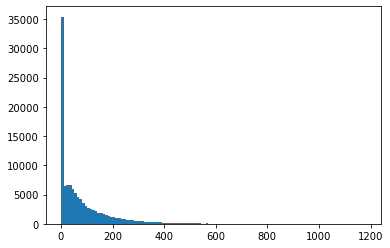

In [35]:
# Histogram of full investors range
bins = np.arange(1, 1190, 10)
plt.hist(df_Funded.Investors, bins = bins);

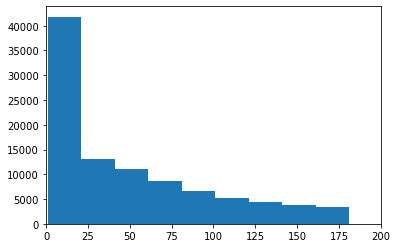

In [36]:
# Narrowing the range down to where the bulk of our right skewed data lie, below 200
bins = np.arange(1, 200, 20)
plt.hist(df_Funded.Investors, bins = bins)
plt.xlim(0,200);

In [37]:
# For CScore, we're interested in the Credit Scores themselves. 
df_CScore.head()

,ListingKey,ProsperRating (numeric),DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,ScorexChangeAtTimeOfListing,ProsperScore,PublicRecordsLast12Months,PublicRecordsLast10Years,combRating,deltaCreditScore
0,1021339766868145413AB3B,0,2007-08-26 18:41:46.780,640.0,659.0,0.0,0,0,0,C,19.0
1,10273602499503308B223C1,6,2014-02-27 08:28:14.000,680.0,699.0,0.0,7,0,1,A,19.0
2,0EE9337825851032864889A,0,2007-01-02 14:09:10.060,480.0,499.0,0.0,0,0,0,HR,19.0
3,0EF5356002482715299901A,6,2012-10-22 11:02:32.000,800.0,819.0,0.0,9,0,0,A,19.0
4,0F023589499656230C5E3E2,3,2013-09-14 18:38:44.000,680.0,699.0,0.0,4,0,0,D,19.0


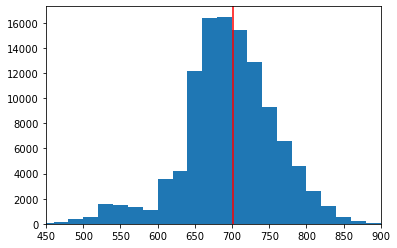

In [38]:
# Historgam of the bulk range between 450 and 899 for the upper limit
bins = np.arange(0, 1000, 20)
plt.hist(df_CScore.CreditScoreRangeUpper, bins = bins)
plt.xlim(450,900)
plt.axvline(df_CScore.CreditScoreRangeUpper.mean(), color = 'r');

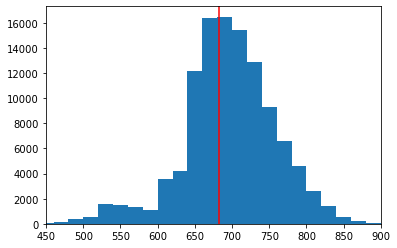

In [39]:
# Historgam of the bulk range between 450 and 899 for the lower limit
bins = np.arange(0, 1000, 20)
plt.hist(df_CScore.CreditScoreRangeLower, bins = bins)
plt.xlim(450,900)
plt.axvline(df_CScore.CreditScoreRangeLower.mean(), color = 'r');

<AxesSubplot:xlabel='combRating', ylabel='count'>

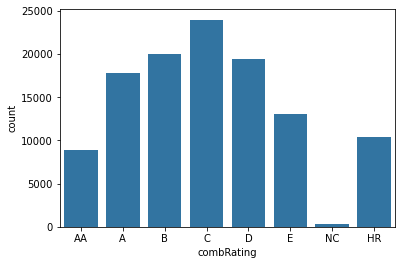

In [40]:
sns.countplot(data = df_CScore, x = 'combRating', color = sns.color_palette()[0])

In [41]:
# I think here we're really more interested in effective yield.
df_Rate.describe()

,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn
count,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,0.192764,0.182701,0.125608,0.059807,0.071546
std,0.074818,0.074516,0.094335,0.053428,0.049426
min,0.000000,-0.010000,-0.182700,0.000000,-0.182700
25%,0.134000,0.124200,0.000000,0.000000,0.000000
50%,0.184000,0.173000,0.131440,0.052400,0.079900
75%,0.250000,0.240000,0.195200,0.097500,0.108700
max,0.497500,0.492500,0.319900,0.366000,0.283700


<AxesSubplot:xlabel='EstimatedEffectiveYield', ylabel='Density'>

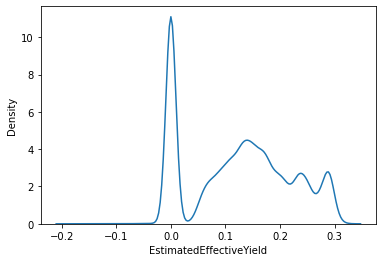

In [42]:
# Kdeplot for estimated effective yield
sns.kdeplot(df_Rate.EstimatedEffectiveYield)

In [43]:
# In df_List we're most interested in "IsBorrowerHomeOwner", but ListingCategory may also come into play
df_List.head()

,ListingKey,IsBorrowerHomeowner,ListingCategory (numeric)
0,1021339766868145413AB3B,True,0
1,10273602499503308B223C1,False,2
2,0EE9337825851032864889A,False,0
3,0EF5356002482715299901A,True,16
4,0F023589499656230C5E3E2,True,2


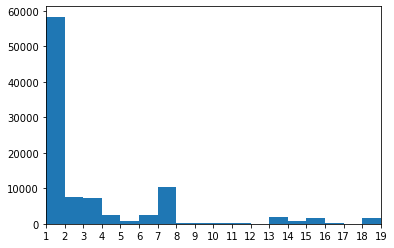

In [44]:
#Histogram for listingcategory
bins = np.arange(df_List['ListingCategory (numeric)'].min(),df_List['ListingCategory (numeric)'].max(), 1)
plt.hist(data = df_List, x = 'ListingCategory (numeric)', bins = bins);
plt.xlim(1,19)
plt.xticks(np.arange(1,20,1));

In [45]:
# for df_Group this isn't a dataframe to be used by itself, but possibly for comparisons later.
df_Group.head()

,ListingKey,CurrentlyInGroup,GroupKey
0,1021339766868145413AB3B,True,NaN
1,10273602499503308B223C1,False,NaN
2,0EE9337825851032864889A,True,783C3371218786870A73D20
3,0EF5356002482715299901A,False,NaN
4,0F023589499656230C5E3E2,False,NaN


In [46]:
# for df_Revolv
df_Revolv.describe()

,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit
count,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,1.139370e+05,113937.000000,113937.000000
mean,9.628637,8.642153,26.590870,6.96979,398.292161,1.642419e+04,0.523848,10467.973670
std,5.867722,5.374413,13.755212,4.63097,447.159711,3.212006e+04,0.337565,19352.809288
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,6.000000,5.000000,17.000000,4.00000,114.000000,2.091000e+03,0.230000,531.000000
50%,9.000000,8.000000,25.000000,6.00000,271.000000,7.593000e+03,0.560000,3457.000000
75%,13.000000,12.000000,35.000000,9.00000,525.000000,1.825400e+04,0.820000,12078.000000
max,59.000000,54.000000,136.000000,51.00000,14985.000000,1.435667e+06,5.950000,646285.000000


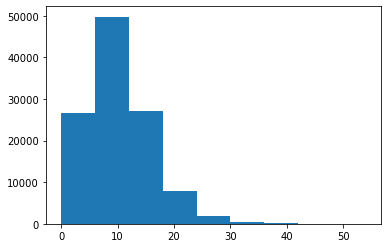

In [47]:
bins = np.arange(0, 60, 6)
plt.hist(df_Revolv.CurrentCreditLines, bins = bins);

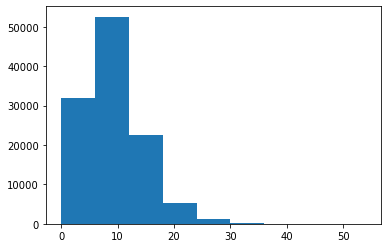

In [48]:
bins = np.arange(0, 60, 6)
plt.hist(df_Revolv.OpenCreditLines, bins = bins);

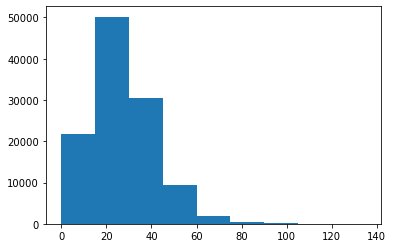

In [49]:
bins = np.arange(0, 140, 15)
plt.hist(df_Revolv.TotalCreditLinespast7years, bins = bins);

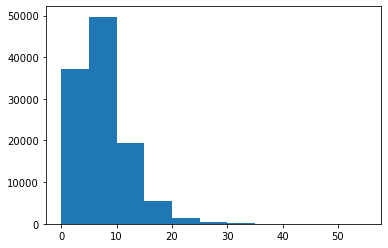

In [50]:
bins = np.arange(0, 60, 5)
plt.hist(df_Revolv.OpenRevolvingAccounts, bins = bins);

In [51]:
# for df_Delinquent, we'll be looking at inquiries and delinquencies
df_Delinquent.describe()

,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,DelinquenciesLast7Years,LoanCurrentDaysDelinquent
count,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,1.426306,5.527599,0.588430,4.118881,152.816539
std,2.432615,6.421654,1.973185,10.123325,466.320254
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,0.000000,0.000000,0.000000
75%,2.000000,7.000000,0.000000,3.000000,0.000000
max,105.000000,379.000000,83.000000,99.000000,2704.000000


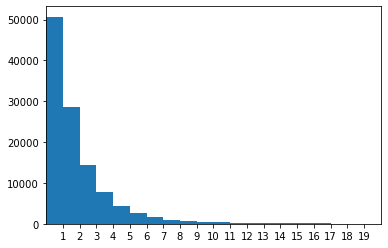

In [52]:
bins = np.arange(0, 106, 1)
plt.hist(df_Delinquent.InquiriesLast6Months, bins = bins)
plt.xlim(0,20)
plt.xticks(np.arange(1,20,1));

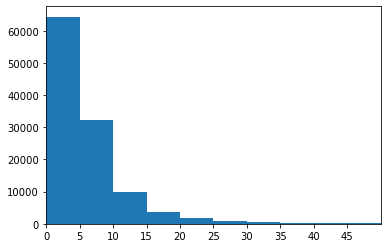

In [53]:
bins = np.arange(0, 379, 5)
plt.hist(df_Delinquent.TotalInquiries, bins = bins)
plt.xlim(0, 50)
plt.xticks(np.arange(0,50,5));

In [54]:
# df_Amount here we're looking at the amounts borrowed
df_Amount.head()

,ListingKey,DebtToIncomeRatio,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter
0,1021339766868145413AB3B,0.17,0,0,0,78,19141,9425,2007-09-12,Q3 2007
1,10273602499503308B223C1,0.18,0,0,0,0,134815,10000,2014-03-03,Q1 2014
2,0EE9337825851032864889A,0.06,0,0,0,86,6466,3001,2007-01-17,Q1 2007
3,0EF5356002482715299901A,0.15,0,0,0,16,77296,10000,2012-11-01,Q4 2012
4,0F023589499656230C5E3E2,0.26,0,0,0,6,102670,15000,2013-09-20,Q3 2013


C:\Users\Chris\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='Density'>

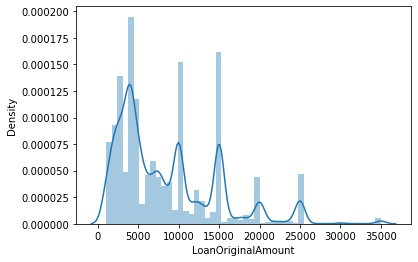

In [55]:
sns.distplot(df_Amount['LoanOriginalAmount'])

Loan original amount is multimodal, it will be interesting perhaps to see what factors influence this

In [56]:
# for df_Status
df_Status.head()

,Term,ListingKey,LoanStatus,ClosedDate
0,36,1021339766868145413AB3B,Completed,2009-08-14
1,36,10273602499503308B223C1,Current,NaT
2,36,0EE9337825851032864889A,Completed,2009-12-17
3,36,0EF5356002482715299901A,Current,NaT
4,36,0F023589499656230C5E3E2,Current,NaT


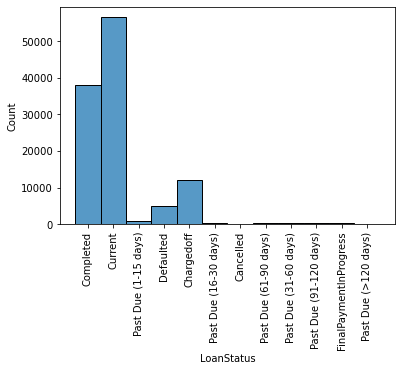

In [57]:
sns.histplot(df_Status.LoanStatus)
plt.xticks(rotation = 'vertical');

In [58]:
# df_Trades
df_Trades.describe()

,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months
count,113937.000000,113937.000000,113937.000000
mean,21.691926,0.959664,0.749204
std,12.843739,0.311843,1.079275
min,0.000000,0.000000,0.000000
25%,13.000000,0.830000,0.000000
50%,21.000000,0.950000,0.000000
75%,29.000000,1.000000,1.000000
max,126.000000,2.000000,20.000000


(0.0, 80.0)

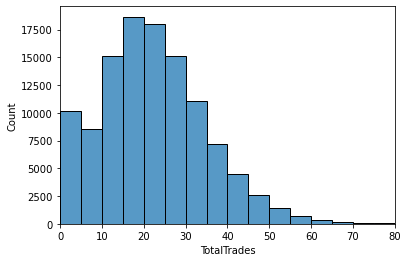

In [59]:
sns.histplot(df_Trades.TotalTrades, bins = np.arange(0, 130, 5))
plt.xlim(0,80)

(0.0, 1.1)

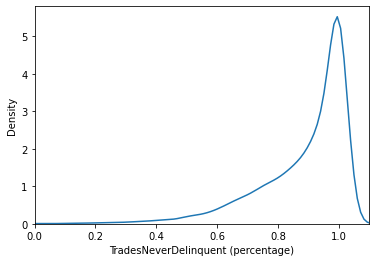

In [60]:
#kde plot with limit of 1.1 (peak is at 1.0) note that there are values out to 2, as assinged earlier.
sns.kdeplot(df_Trades['TradesNeverDelinquent (percentage)'])
plt.xlim(0,1.1)

In [61]:
# df_Income
df_Income.head()

,ListingKey,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,1021339766868145413AB3B,"$25,000-49,999",True,3083.333333
1,10273602499503308B223C1,"$50,000-74,999",True,6125.000000
2,0EE9337825851032864889A,Not displayed,True,2083.333333
3,0EF5356002482715299901A,"$25,000-49,999",True,2875.000000
4,0F023589499656230C5E3E2,"$100,000+",True,9583.333333


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

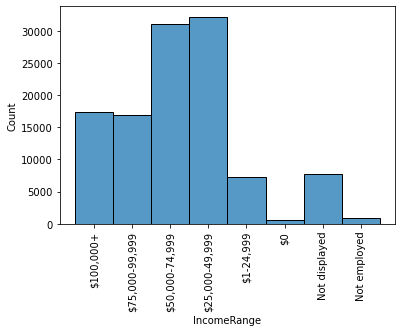

In [62]:
sns.histplot(df_Income.IncomeRange);
plt.xticks(rotation = 'vertical')

In [63]:
# df_Payments loan payments 
df_Payments.describe()

,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments
count,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,0.275459,4.445483,4.317088,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686
std,0.654774,12.410277,12.093052,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937
min,0.000000,0.000000,0.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000
25%,0.000000,0.000000,0.000000,131.620000,1005.760000,500.890000,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,217.740000,2583.830000,1587.500000,700.840100,-34.440000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,371.580000,5548.400000,4000.000000,1458.540000,-13.920000,0.000000,0.000000,0.000000,0.000000
max,8.000000,141.000000,141.000000,2251.510000,40702.390000,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000


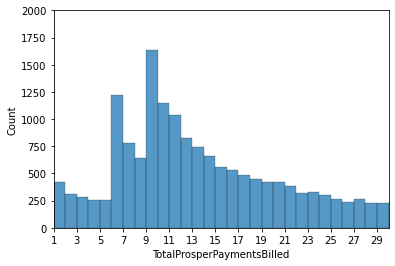

In [64]:
bins = np.arange(0,141,1)
sns.histplot(df_Payments.TotalProsperPaymentsBilled, bins = bins)
plt.xlim(1,30)
plt.ylim(0,2000)
plt.xticks(np.arange(1,30,2));

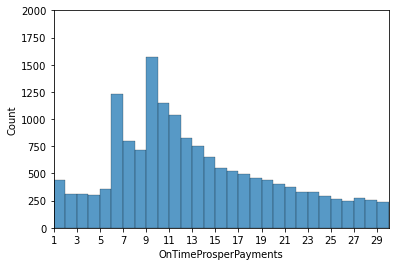

In [65]:
bins = np.arange(0,141,1)
sns.histplot(df_Payments.OnTimeProsperPayments, bins = bins)
plt.xlim(1,30)
plt.ylim(0,2000)
plt.xticks(np.arange(1,30,2));

In [66]:
# df_Employment
df_Employment.EmploymentStatus.value_counts(), df.EmploymentStatus.value_counts()

(Employed         67322
 Full-time        26355
 Self-employed     6134
 Not available     5347
 Other             3806
 Part-time         1088
 Not employed       835
 Retired            795
 Name: EmploymentStatus, dtype: int64,
 Employed         67322
 Full-time        26355
 Self-employed     6134
 Not available     5347
 Other             3806
 Part-time         1088
 Not employed       835
 Retired            795
 Name: EmploymentStatus, dtype: int64)

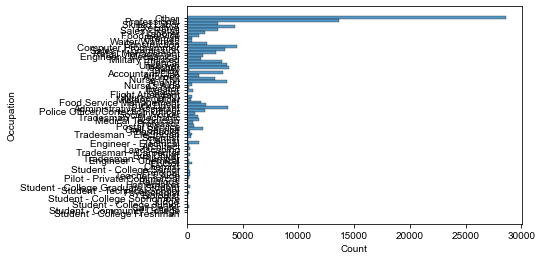

In [67]:
sns.histplot(y = df_Employment.Occupation)
sns.set(rc={'figure.figsize':(50,20)})

In [68]:
# Fix datatype for employment status and fill nas
df_Employment.EmploymentStatus.fillna(value = 'Not available', inplace = True)
df_Employment.EmploymentStatus = df_Employment.EmploymentStatus.astype(empstat)
df_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ListingKey                113937 non-null  object  
 1   Occupation                113937 non-null  object  
 2   EmploymentStatus          113937 non-null  category
 3   EmploymentStatusDuration  106312 non-null  float64 
dtypes: category(1), float64(1), object(2)
memory usage: 2.7+ MB


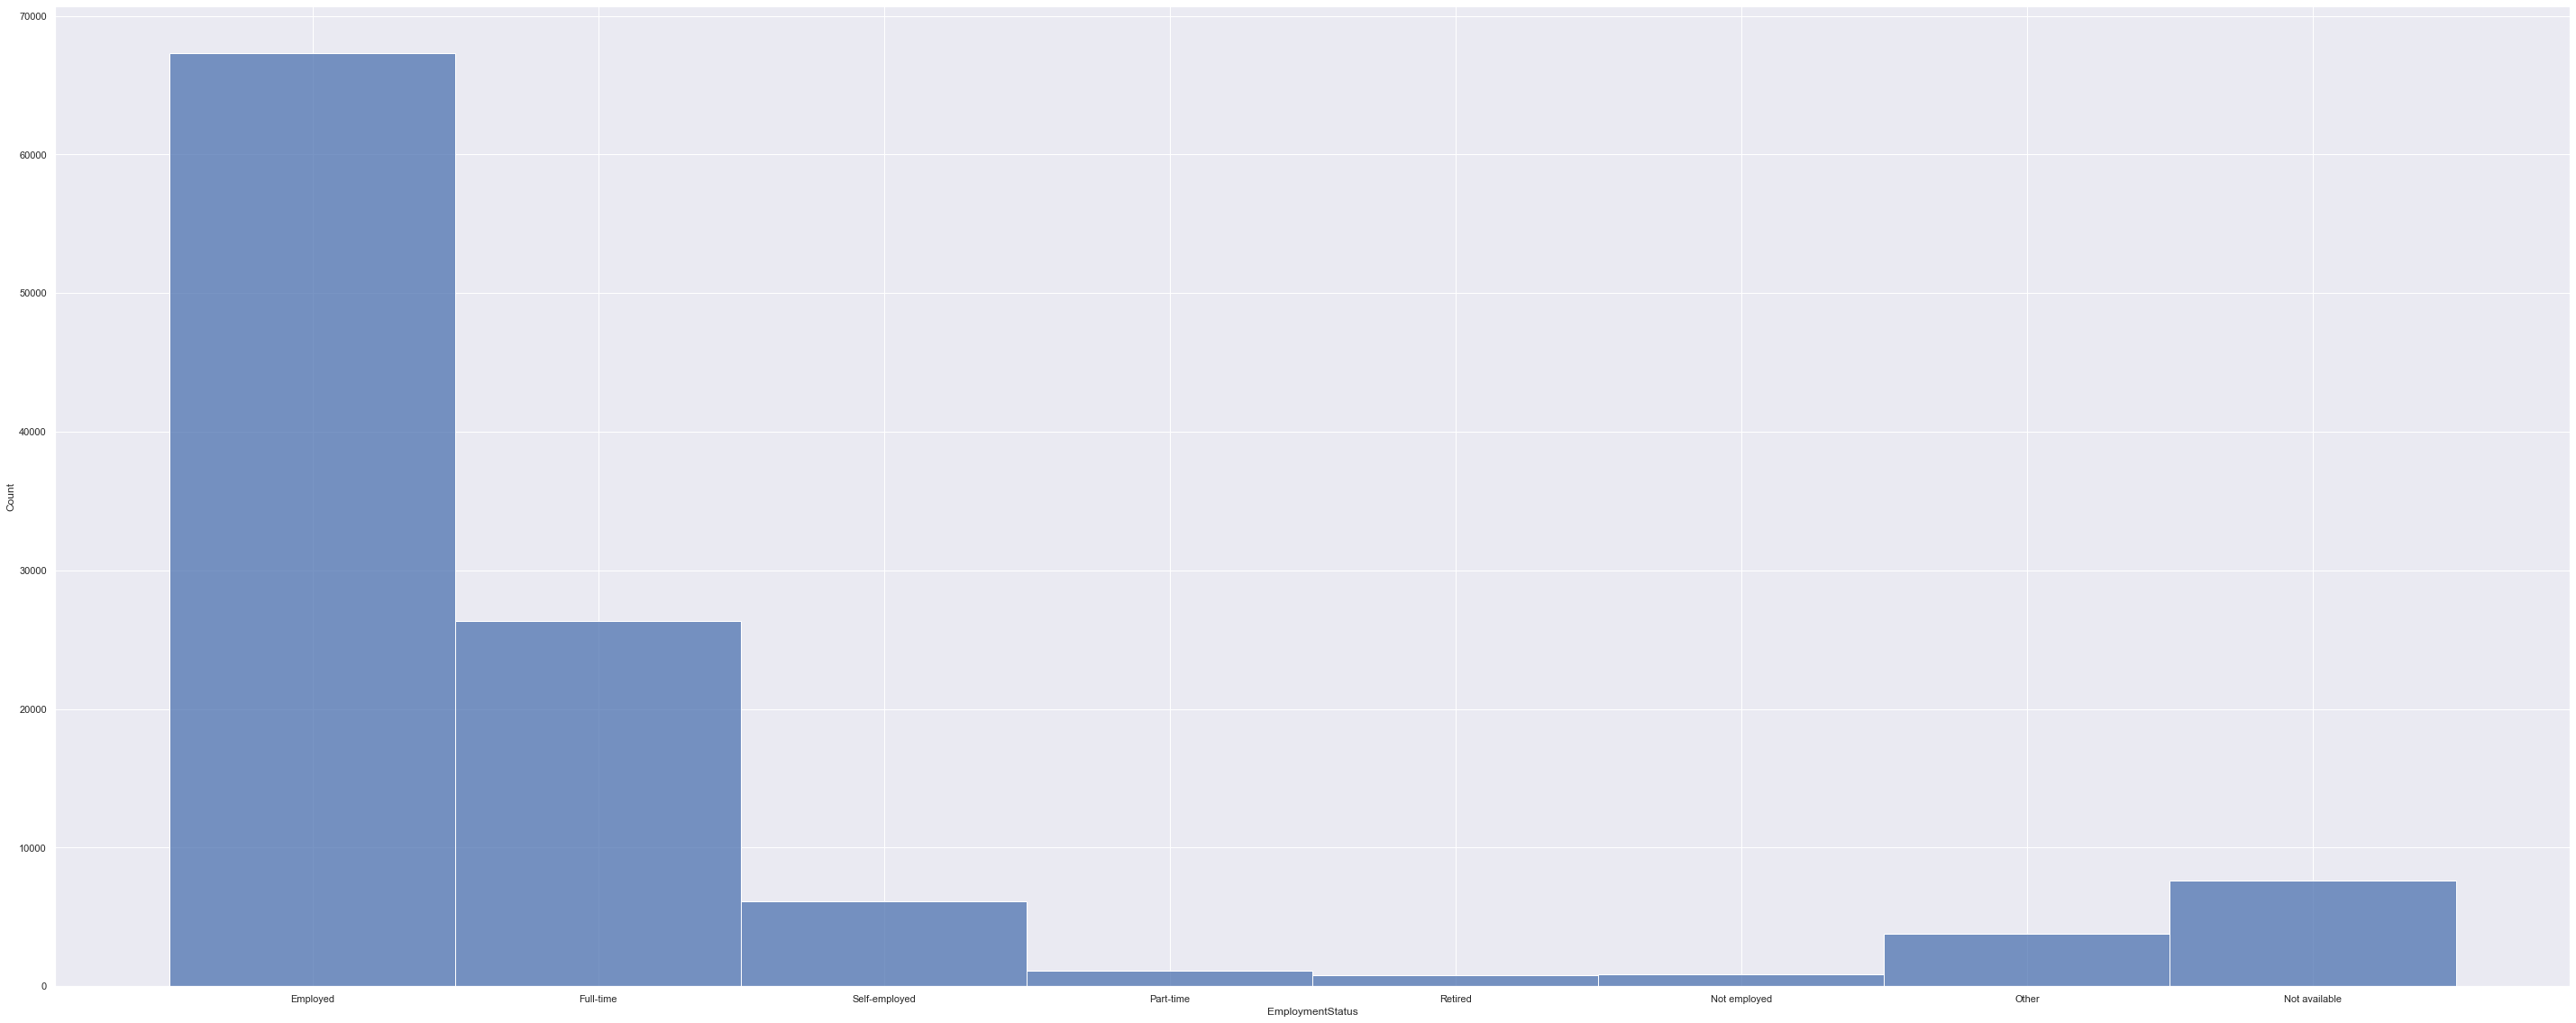

In [69]:
sns.histplot(df_Employment.EmploymentStatus)
sns.set(rc={'figure.figsize':(8,5)})

### Begin bivariate exploration. 
#### Questions to ask for this:

In [70]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64